<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Gaussian mixture models
© ExploreAI Academy

In this exercise, we'll apply Gaussian Mixture Models to the Iris dataset to understand clustering dynamics, evaluate the effectiveness of different numbers of clusters, and explore the impact of covariance types on clustering.

## Learning objectives

By the end of this exercise, you should be able to:
- Confidently implement Gaussian Mixture Models using Scikit-learn on any dataset.
- Evaluate model performance with different numbers of clusters.
- Understand the effect of different covariance types on the clustering outcome.

## Exercises

### Exercise 1: Load data
For this exercise, we'll use the Iris dataset, a famous multivariate dataset introduced by Sir Ronald Fisher in 1936, as an example of discriminant analysis. The dataset consists of 150 samples from **three species of Iris flowers** (Iris setosa, Iris virginica, and Iris versicolor) with **four features**: the length and the width of the sepals and petals.

1. Load the Iris dataset.
   
   **HINT**: Use the `load_iris()` function.
2. Apply PCA to reduce the feature space from four dimensions to two.
3. Plot the PCA-reduced data, colouring each point by its species label to visually assess the natural clusters within the data.

In [2]:
# Load the Iris dataset
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

# Convert the dataset to pandas DataFrame
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Display the first few rows of the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
# Step 2: Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Extract features (sepal length, sepal width, petal length, petal width)
X = iris.data

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame for PCA-reduced data
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the target (species) column
df_pca['species'] = iris.target

# Display the first few rows of the PCA-reduced DataFrame
print(df_pca.head())

        PC1       PC2  species
0 -2.684126  0.319397        0
1 -2.714142 -0.177001        0
2 -2.888991 -0.144949        0
3 -2.745343 -0.318299        0
4 -2.728717  0.326755        0


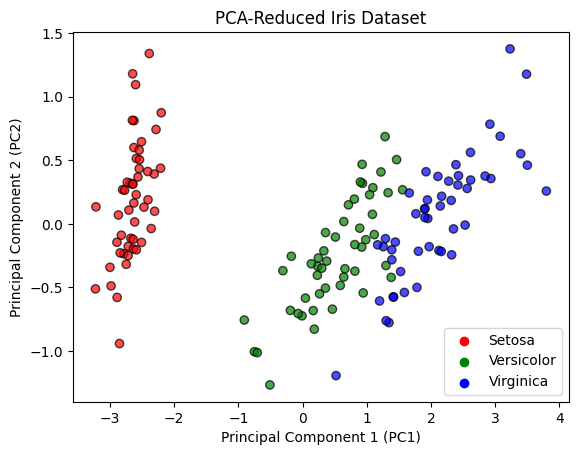

In [6]:
# Step 3: Plot the PCA-rduced data
import matplotlib.pyplot as plt

# Color mapping for species labels
color_map  = {0: 'red', 1: 'green', 2: 'blue'}
colors = [color_map[label] for label in df_pca['species']]

# Create a scatter plot with the PCA-reduced data
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=colors, alpha=0.7, edgecolors='k')

# Add labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA-Reduced Iris Dataset')

# Add legend
species_names = ['Setosa', 'Versicolor', 'Virginica']
for i, name in enumerate(species_names):
    plt.scatter([], [], label=name, color=color_map[i])
plt.legend()

# Show the plot
plt.show()

### Exercise 2: Basic GMM application

Apply a Gaussian Mixture Model to the Iris dataset.
  1. Fit a GMM to the PCA-reduced data.
  2. Use three components (as suggested by the original labels).
  3. Plot the clustering results, showing the data points coloured by cluster.

In [18]:
from sklearn.mixture import GaussianMixture

# Initialize GMM with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit GMM to the PCA-reduced data
gmm.fit(df_pca[['PC1', 'PC2']])

# Get cluster assignments for each sample
cluster_labels = gmm.predict(df_pca[['PC1', 'PC2']])

# Add cluster labels to the DataFrame
df_pca['cluster'] = cluster_labels

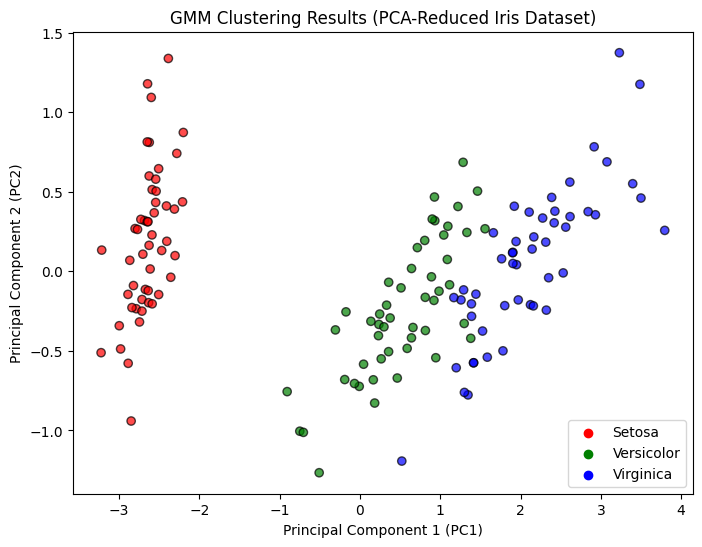

In [19]:
# Plot the clustering results with species names
plt.figure(figsize=(8, 6))

# Color mapping for species labels
species_colors = {0: 'red', 1: 'green', 2: 'blue'}
colors = [species_colors[label] for label in df_pca['species']]

# Scatter plot
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=colors, alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('GMM Clustering Results (PCA-Reduced Iris Dataset)')

# Add legend with species names
species_names = ['Setosa', 'Versicolor', 'Virginica']
for i, name in enumerate(species_names):
    plt.scatter([], [], c=species_colors[i], label=name)
plt.legend()

plt.show()


### Exercise 3: Finding the optimal number of clusters

Determine the optimal number of clusters for the Iris dataset using the Bayesian Information Criterion (BIC).

  1. Fit GMMs with different numbers of components (from 1 to 6).
  2. Calculate and plot the BIC for each model.

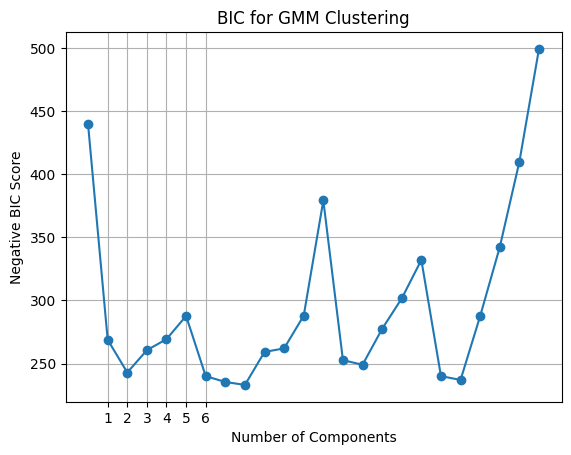

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Define a function to compute the negative BIC score
def gmm_bic_score(estimator, X):
    return -estimator.bic(X)

# Set up parameter grid for GridSearchCV
param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}

# Perform grid search to find the best GMM model
grid_search = GridSearchCV(
    GaussianMixture(),
    param_grid=param_grid,
    scoring=gmm_bic_score,
)
grid_search.fit(X)

# Get the best model and its parameters
best_gmm = grid_search.best_estimator_
best_components = grid_search.best_params_["n_components"]

# Plot the BIC scores
bic_scores = -grid_search.cv_results_["mean_test_score"]
x = np.arange(len(bic_scores))

plt.plot(x, bic_scores, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Negative BIC Score")
plt.title("BIC for GMM Clustering")
plt.xticks(range(1, 7))
plt.grid(True)
plt.show()

The plot obtained is a line graph representing the Bayesian Information Criterion (BIC) scores for different numbers of clusters in the Gaussian Mixture Model (GMM) clustering analysis. The x-axis shows the number of components (clusters) ranging from 1 to 6, and the y-axis shows the negative BIC scores. The graph has a notable dip at the component number 2, suggesting that two clusters might be the optimal number according to the BIC for this particular dataset. This kind of analysis is useful in determining the most appropriate number of clusters for data modeling in statistical analysis or machine learning.

### Exercise 4: Effect of covariance type
Analyse the impact of different covariance types on the clustering results.
  1. Fit GMMs using the full, tied, diag, and spherical covariance types.
  2. Plot the clustering results for each type.

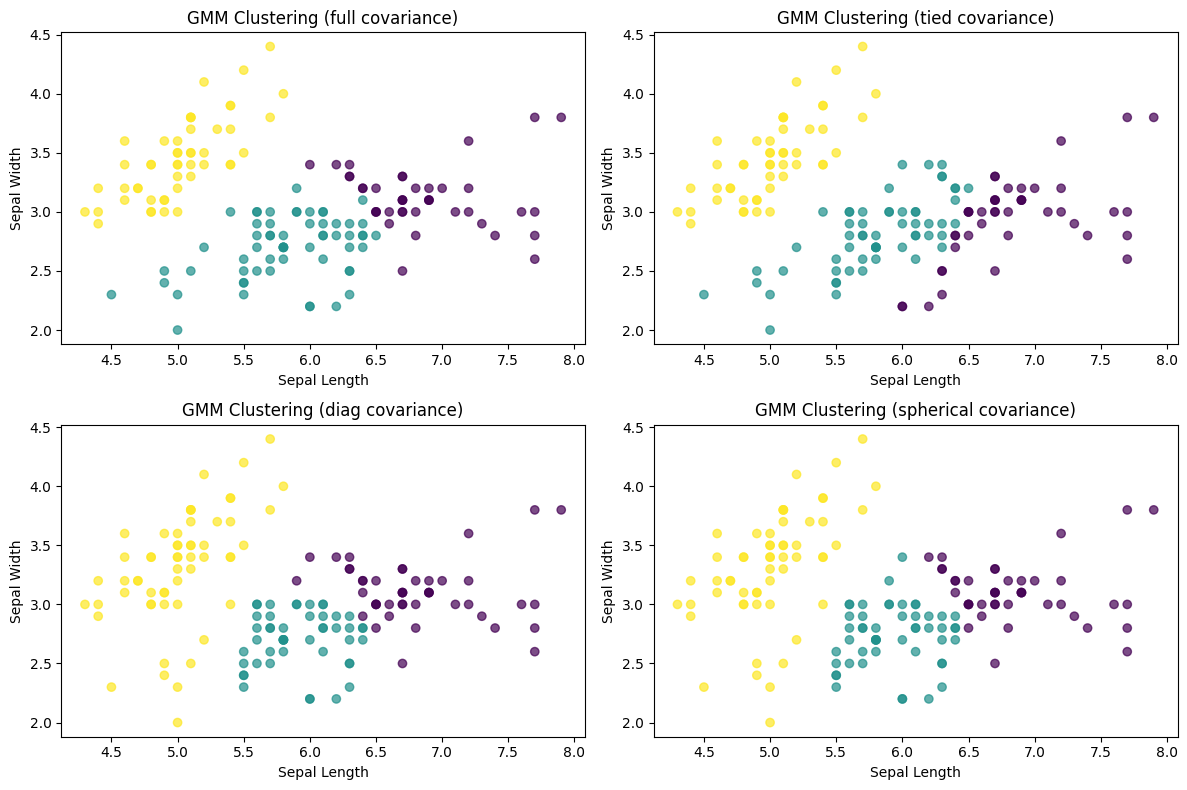

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only sepal length and sepal width

# Fit GMMs with different covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']
gmm_models = []

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
    gmm.fit(X)
    gmm_models.append(gmm)

# Plot the clustering results
plt.figure(figsize=(12, 8))

for i, cov_type in enumerate(covariance_types):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=gmm_models[i].predict(X), cmap='viridis', alpha=0.7)
    plt.title(f'GMM Clustering ({cov_type} covariance)')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>